In [6]:
import numpy as np;
import pandas as pd;
import operator;

In [38]:
def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

def createDataSet2():
    group = np.array([[1.0,1.1,1],[1.0,1.0,1.5],[9,9,10],[9,9.8,10]])
    labels = ['A','A','B','B']
    return group, labels

def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    print dataSet.shape
    print np.tile(inX, (dataSetSize,1))
    diffMat = np.tile(inX, (dataSetSize,1)) - dataSet
    print diffMat
    sqDiffMat = diffMat**2
    print sqDiffMat
    sqDistances = sqDiffMat.sum(axis=1)
    print sqDistances
    distances = sqDistances**0.5
    print distances
    sortedDistIndicies = distances.argsort()
    print sortedDistIndicies
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    print classCount
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    print sortedClassCount
    return sortedClassCount[0][0]

group, labels = createDataSet2()

classify0([5,7,5], group, labels, 3)
    

(4L, 3L)
[[5 7 5]
 [5 7 5]
 [5 7 5]
 [5 7 5]]
[[ 4.   5.9  4. ]
 [ 4.   6.   3.5]
 [-4.  -2.  -5. ]
 [-4.  -2.8 -5. ]]
[[ 16.    34.81  16.  ]
 [ 16.    36.    12.25]
 [ 16.     4.    25.  ]
 [ 16.     7.84  25.  ]]
[ 66.81  64.25  45.    48.84]
[ 8.17373843  8.01560977  6.70820393  6.98856208]
[2 3 1 0]
{'A': 1, 'B': 2}
[('B', 2), ('A', 1)]


'B'

In [8]:
def file2matrix(filename):
    rows = 0
    data = []
    with open(filename) as f:
        data = f.readlines()
        rows = len(data)
    return_matrix = np.zeros((rows,3))
    class_vector = []
    if rows > 0:
        index = 0
        for row in data:
            row_split = row.split("\t")
            return_matrix[index,:] = row_split[0:3]
            class_vector.append(row_split[-1].strip())
            index += 1
    return return_matrix, class_vector
#print file2matrix("datingTestSet.txt")[0]

# use pandas to load data
def file2matrix_pandas(filename):
    dt = pd.read_csv(filename,sep="\t", names=["frequent", "pencentage", "num", "class"])
    return_matrix = dt[["frequent", "pencentage", "num"]].as_matrix()
    class_vector = dt["class"].tolist()
    return return_matrix, class_vector
    
data_mat, data_class = file2matrix_pandas("datingTestSet2.txt")

In [9]:
print data_class

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1, 3, 1, 3, 2, 3, 1, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 2, 1, 1, 1, 3, 3, 2, 1, 1, 1, 2, 2, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 3, 2, 3, 3, 3, 3, 1, 2, 3, 1, 1, 1, 3, 1, 3, 2, 2, 1, 3, 1, 3, 2, 2, 1, 2, 2, 3, 1, 3, 2, 1, 1, 3, 3, 2, 3, 3, 2, 3, 1, 3, 1, 3, 3, 1, 3, 2, 1, 3, 

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

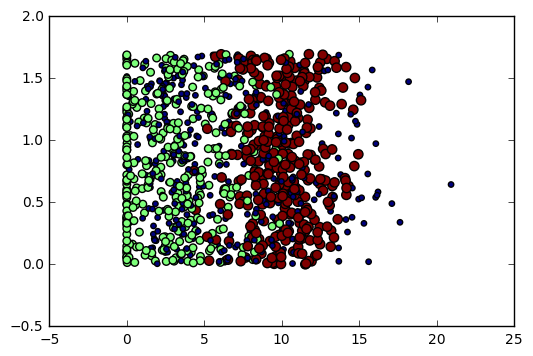

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data_mat[:,1], data_mat[:,2], 15.0*np.array(data_class), 15.0*np.array(data_class))
plt.show()

In [33]:
from os import listdir
def img2vector(filename):
    returnVect = np.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('trainingDigits')           #load the training set
    m = len(trainingFileList)
    trainingMat = np.zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('trainingDigits/%s' % fileNameStr)
    testFileList = listdir('testDigits')        #iterate through the test set
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        print fileNameStr
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print "the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr)
        if (classifierResult != classNumStr): errorCount += 1.0
        break;
    print "\nthe total number of errors is: %d" % errorCount
    print "\nthe total error rate is: %f" % (errorCount/float(mTest))

In [34]:
handwritingClassTest()

0_0.txt
(1934L, 1024L)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[ 154.  142.   89. ...,  365.  192.  225.]
[ 12.40967365  11.91637529   9.43398113 ...,  19.10497317  13.85640646  15.        ]
[ 162   26    2 ..., 1050 1053 1465]
{0: 3}
[(0, 3)]
the classifier came back with: 0, the real answer is: 0

the total number of errors is: 0

the total error rate is: 0.000000


In [12]:
z23 = np.zeros((2,3))

In [13]:
z23.shape

(2L, 3L)

In [14]:
z23[0,:] = [1,2,3]

In [15]:
z23

array([[ 1.,  2.,  3.],
       [ 0.,  0.,  0.]])

In [16]:
z23[0, :]

array([ 1.,  2.,  3.])